Loading Data & Model


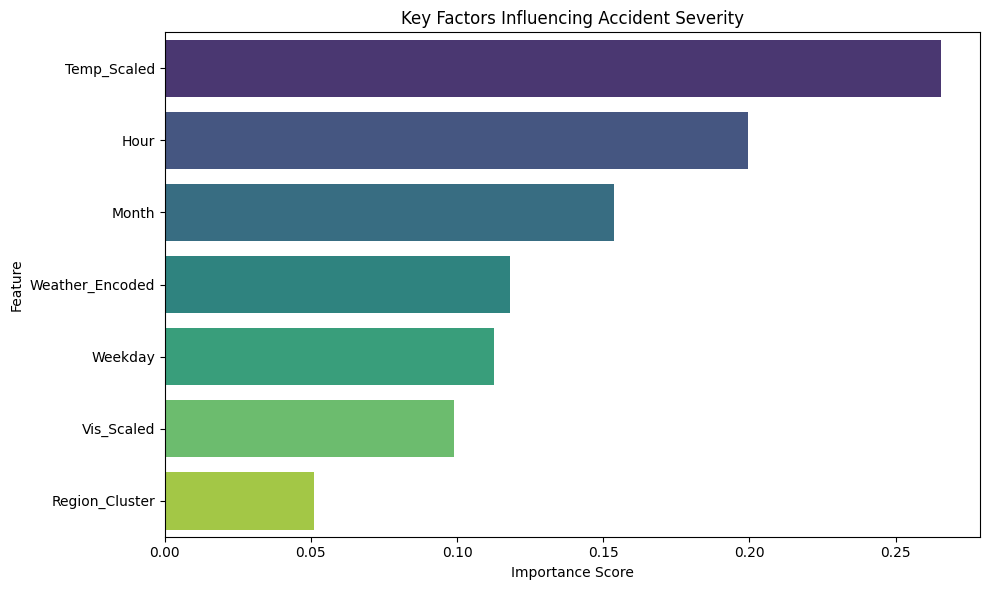

Saved feature_importance.png


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import joblib

print("Loading Data & Model")
df = pd.read_csv("../data/modern_training_data.csv")
model = joblib.load("../models/accident_severity_model.pkl")

X = df.drop(columns=['Severity'])
y = df['Severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_pred = model.predict(X_test)



plt.figure(figsize=(10, 6))
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

sns.barplot(x=importances[indices], y=feature_names[indices], hue=feature_names[indices], legend=False, palette="viridis")
plt.title("Key Factors Influencing Accident Severity")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300)
plt.show()
print("Saved feature_importance.png")

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/01/18/d154dc1638803adf987910cdd07097d9c526663a55666a97c124d09fb96a/scikit_learn-1.8.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Using cached scikit_learn-1.8.0-cp311-cp311-macosx_12_0_arm64.whl.metadata (11 kB)
  Obtaining dependency information for scipy>=1.10.0 from https://files.pythonhosted.org/packages/c1/20/095ad24e031ee8ed3c5975954d816b8e7e2abd731e04f8be573de8740885/scipy-1.17.0-cp311-cp311-macosx_14_0_arm64.whl.metadata
  Using cached scipy-1.17.0-cp311-cp311-macosx_14_0_arm64.whl.metadata (62 kB)
  Obtaining dependency information for joblib>=1.3.0 from https://files.pythonhosted.org/packages/7b/91/984aca2ec129e2757d1e4e3c81c3fcda9d0f85b74670a094cc443d9ee949/joblib-1.5.3-py3-none-any.whl.metadata
  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
  Obtaining dependency information for threadpoolctl>=3.2.0 from https://files.pythonhosted.org/packages/32/d5/f9a850d79b0

In [3]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test.iloc[:100]) # Run on small sample for speed

# Plot
plt.figure()
shap.summary_plot(shap_values, X_test.iloc[:100], show=False)
plt.savefig('shap_summary.png', bbox_inches='tight')

ModuleNotFoundError: No module named 'shap'